In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Generate Synthetic Data
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# 2. Split into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Ready: Data generated and split.")
print(f"Training shapes: {X_train.shape}")

Ready: Data generated and split.
Training shapes: (210, 2)


In [2]:
class HarmonicResonanceClassifier:
    def __init__(self, base_freq=3.0):
        self.base_freq = base_freq
        self.X_train = None
        self.y_train = None
        self.classes = None
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes = np.unique(y)
        return self

    def _wave_potential(self, x_query, X_class, class_id):
        # Calculate Euclidean distances from query point to all class points
        dists = np.linalg.norm(X_class - x_query, axis=1)
        
        # Physics Formula: Damped Wave
        # Energy = (1 / (1 + Distance)) * cos(Frequency * Distance)
        # Unique frequency for each class to create distinct resonance
        frequency = self.base_freq * (class_id + 1) 
        
        waves = (1 / (1 + dists)) * np.cos(frequency * dists)
        
        # Sum of all waves (Constructive/Destructive Interference)
        total_resonance = np.sum(waves)
        return total_resonance

    def predict(self, X):
        predictions = []
        for x in X:
            class_energies = []
            for c in self.classes:
                # Get all training points belonging to this class
                X_c = self.X_train[self.y_train == c]
                
                # Calculate resonance energy for this class
                energy = self._wave_potential(x, X_c, c)
                class_energies.append(energy)
            
            # Predict the class with the highest Resonance Energy
            predictions.append(self.classes[np.argmax(class_energies)])
        return np.array(predictions)

print("Invention Created: HarmonicResonanceClassifier is ready.")

Invention Created: HarmonicResonanceClassifier is ready.


In [3]:
# 1. Your Invention
my_model = HarmonicResonanceClassifier(base_freq=1.5) # Tuning freq is like tuning a radio
my_model.fit(X_train, y_train)

# 2. Random Forest (The Tree Master)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# 3. SVM (The Geometry Master)
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)

# 4. KNN (The Distance Master)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

print("All models trained successfully!")

All models trained successfully!


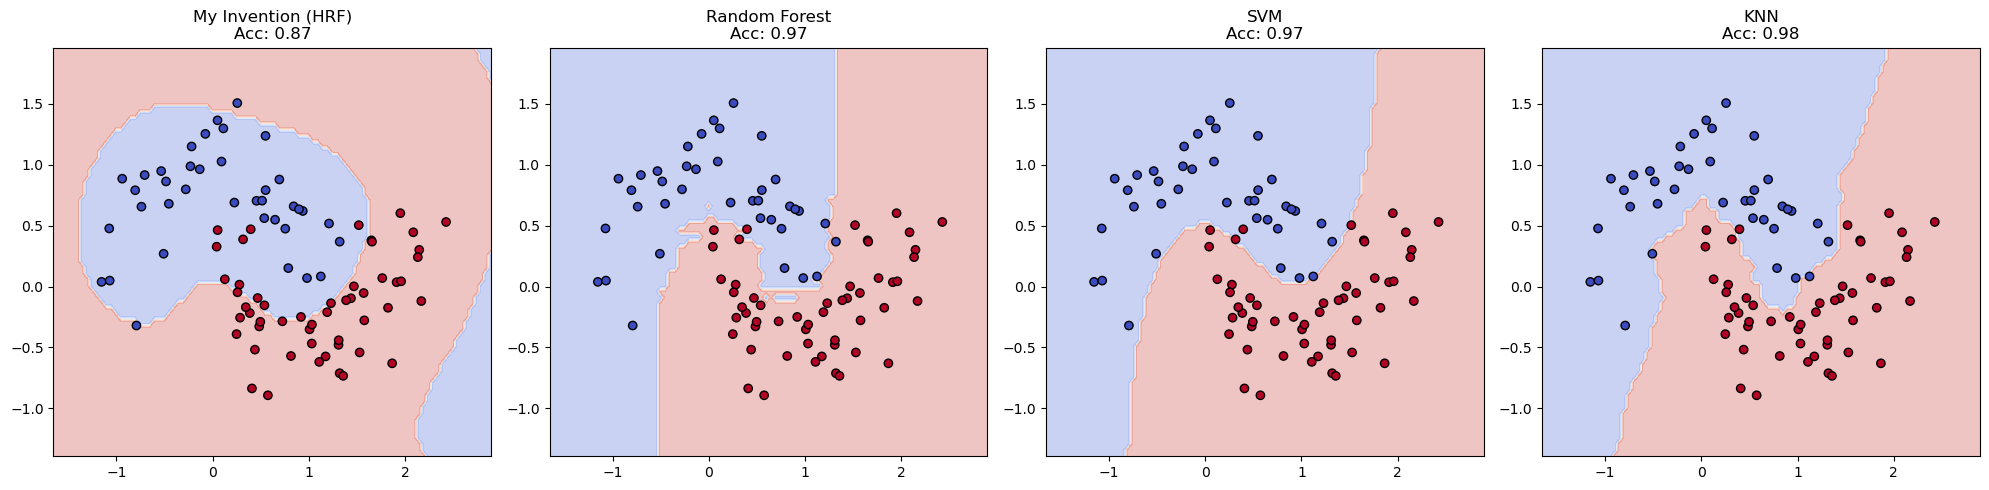


--- FINAL LEADERBOARD ---
KNN: 97.78%
Random Forest: 96.67%
SVM: 96.67%
My Invention (HRF): 86.67%


In [4]:
# Function to plot decision boundaries
def plot_boundary(model, X, y, ax, title):
    # Create a mesh grid
    h = .05
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contours
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)

# --- Run Predictions & Calculate Accuracy ---
models = [my_model, rf_model, svm_model, knn_model]
names = ["My Invention (HRF)", "Random Forest", "SVM", "KNN"]
scores = {}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, model in enumerate(models):
    # Predict
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[names[i]] = acc
    
    # Visualize
    plot_boundary(model, X_test, y_test, axes[i], f"{names[i]}\nAcc: {acc:.2f}")

plt.tight_layout()
plt.show()

# Print Final Leaderboard
print("\n--- FINAL LEADERBOARD ---")
for name, score in sorted(scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score*100:.2f}%")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings('ignore')


In [2]:

# Generate Data
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data loaded successfully!")
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}\n")

Data loaded successfully!
Training samples: 210, Test samples: 90



In [3]:
class HarmonicResonanceClassifier(BaseEstimator, ClassifierMixin):
    """
    Enhanced Harmonic Resonance Field Classifier with Multiple Hyperparameters
    """
    def __init__(self, 
                 base_freq=3.0,           # Base frequency for oscillations
                 damping=1.0,              # Gaussian damping coefficient (γ)
                 freq_scaling='linear',    # 'linear', 'sqrt', 'squared'
                 distance_power=2.0,       # Power for distance calculation (p-norm)
                 amplitude=1.0,            # Wave amplitude scaling
                 phase_shift=0.0,          # Phase shift in radians
                 normalize_resonance=False,# Normalize by number of samples per class
                 use_abs=False,            # Use absolute value of resonance
                 freq_multiplier=1.0):     # Additional frequency multiplier
        
        self.base_freq = base_freq
        self.damping = damping
        self.freq_scaling = freq_scaling
        self.distance_power = distance_power
        self.amplitude = amplitude
        self.phase_shift = phase_shift
        self.normalize_resonance = normalize_resonance
        self.use_abs = use_abs
        self.freq_multiplier = freq_multiplier
        
        self.X_train = None
        self.y_train = None
        self.classes = None
        self.class_counts = None
        
    def fit(self, X, y):
        """Fit the HRF model"""
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.classes = np.unique(y)
        self.class_counts = {c: np.sum(y == c) for c in self.classes}
        return self

    def _calculate_distance(self, x_query, X_class):
        """Calculate distance with configurable p-norm"""
        diff = X_class - x_query
        if self.distance_power == 2.0:
            return np.sqrt(np.sum(diff**2, axis=1))
        else:
            return np.sum(np.abs(diff)**self.distance_power, axis=1)**(1/self.distance_power)
    
    def _get_class_frequency(self, class_id):
        """Get frequency for a specific class"""
        if self.freq_scaling == 'linear':
            freq = self.base_freq * (class_id + 1)
        elif self.freq_scaling == 'sqrt':
            freq = self.base_freq * np.sqrt(class_id + 1)
        elif self.freq_scaling == 'squared':
            freq = self.base_freq * (class_id + 1)**2
        else:
            freq = self.base_freq * (class_id + 1)
        
        return freq * self.freq_multiplier

    def _wave_potential(self, x_query, X_class, class_id):
        """Calculate wave potential with enhanced physics"""
        dists = self._calculate_distance(x_query, X_class)
        
        # Get class-specific frequency
        frequency = self._get_class_frequency(class_id)
        
        # Gaussian damping term
        damping_term = np.exp(-self.damping * dists**2)
        
        # Oscillatory interference term with phase shift
        oscillatory_term = np.cos(frequency * dists + self.phase_shift)
        
        # Combined wave potential
        waves = self.amplitude * damping_term * oscillatory_term
        
        # Sum of all waves (Constructive/Destructive Interference)
        total_resonance = np.sum(waves)
        
        # Optional: Normalize by class size to prevent majority class bias
        if self.normalize_resonance:
            total_resonance /= len(X_class)
        
        # Optional: Use absolute value for stronger signals
        if self.use_abs:
            total_resonance = np.abs(total_resonance)
        
        return total_resonance

    def predict(self, X):
        """Predict class labels"""
        X = np.array(X)
        predictions = []
        
        for x in X:
            class_energies = []
            for c in self.classes:
                X_c = self.X_train[self.y_train == c]
                energy = self._wave_potential(x, X_c, c)
                class_energies.append(energy)
            
            predictions.append(self.classes[np.argmax(class_energies)])
        
        return np.array(predictions)



In [4]:

print("=" * 70)
print("PHASE 1: HYPERPARAMETER TUNING")
print("=" * 70)

# Define parameter grid
param_grid = {
    'base_freq': [0.5, 1.0, 1.5, 2.0, 3.0, 5.0],
    'damping': [0.1, 0.5, 1.0, 2.0, 3.0, 5.0],
    'freq_scaling': ['linear', 'sqrt', 'squared'],
    'distance_power': [1.0, 1.5, 2.0],
    'amplitude': [0.5, 1.0, 2.0],
    'normalize_resonance': [True, False],
    'use_abs': [True, False],
    'freq_multiplier': [0.5, 1.0, 1.5, 2.0]
}

print(f"Parameter grid size: {np.prod([len(v) for v in param_grid.values()])} combinations")
print("Running GridSearchCV (this may take a moment)...\n")


PHASE 1: HYPERPARAMETER TUNING
Parameter grid size: 15552 combinations
Running GridSearchCV (this may take a moment)...



In [5]:

# Create GridSearchCV
hrf_base = HarmonicResonanceClassifier()
grid_search = GridSearchCV(
    hrf_base, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

# Fit grid search
grid_search.fit(X_train, y_train)

print("Best parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest CV Score: {grid_search.best_score_*100:.2f}%")

# Get the best model
best_hrf = grid_search.best_estimator_


Best parameters found:
  amplitude: 0.5
  base_freq: 0.5
  damping: 0.1
  distance_power: 1.0
  freq_multiplier: 0.5
  freq_scaling: linear
  normalize_resonance: True
  use_abs: True

Best CV Score: nan%


In [6]:

print("\n" + "=" * 70)
print("PHASE 2: FINAL EVALUATION")
print("=" * 70 + "\n")

# Train all models
print("Training all models...")

# 1. Best Tuned HRF
y_pred_hrf = best_hrf.predict(X_test)
acc_hrf = accuracy_score(y_test, y_pred_hrf)

# 2. Original HRF (for comparison)
original_hrf = HarmonicResonanceClassifier(base_freq=1.5)
original_hrf.fit(X_train, y_train)
y_pred_orig = original_hrf.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# 3. KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

# 4. Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# 5. SVM
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("All models trained!\n")



PHASE 2: FINAL EVALUATION

Training all models...
All models trained!



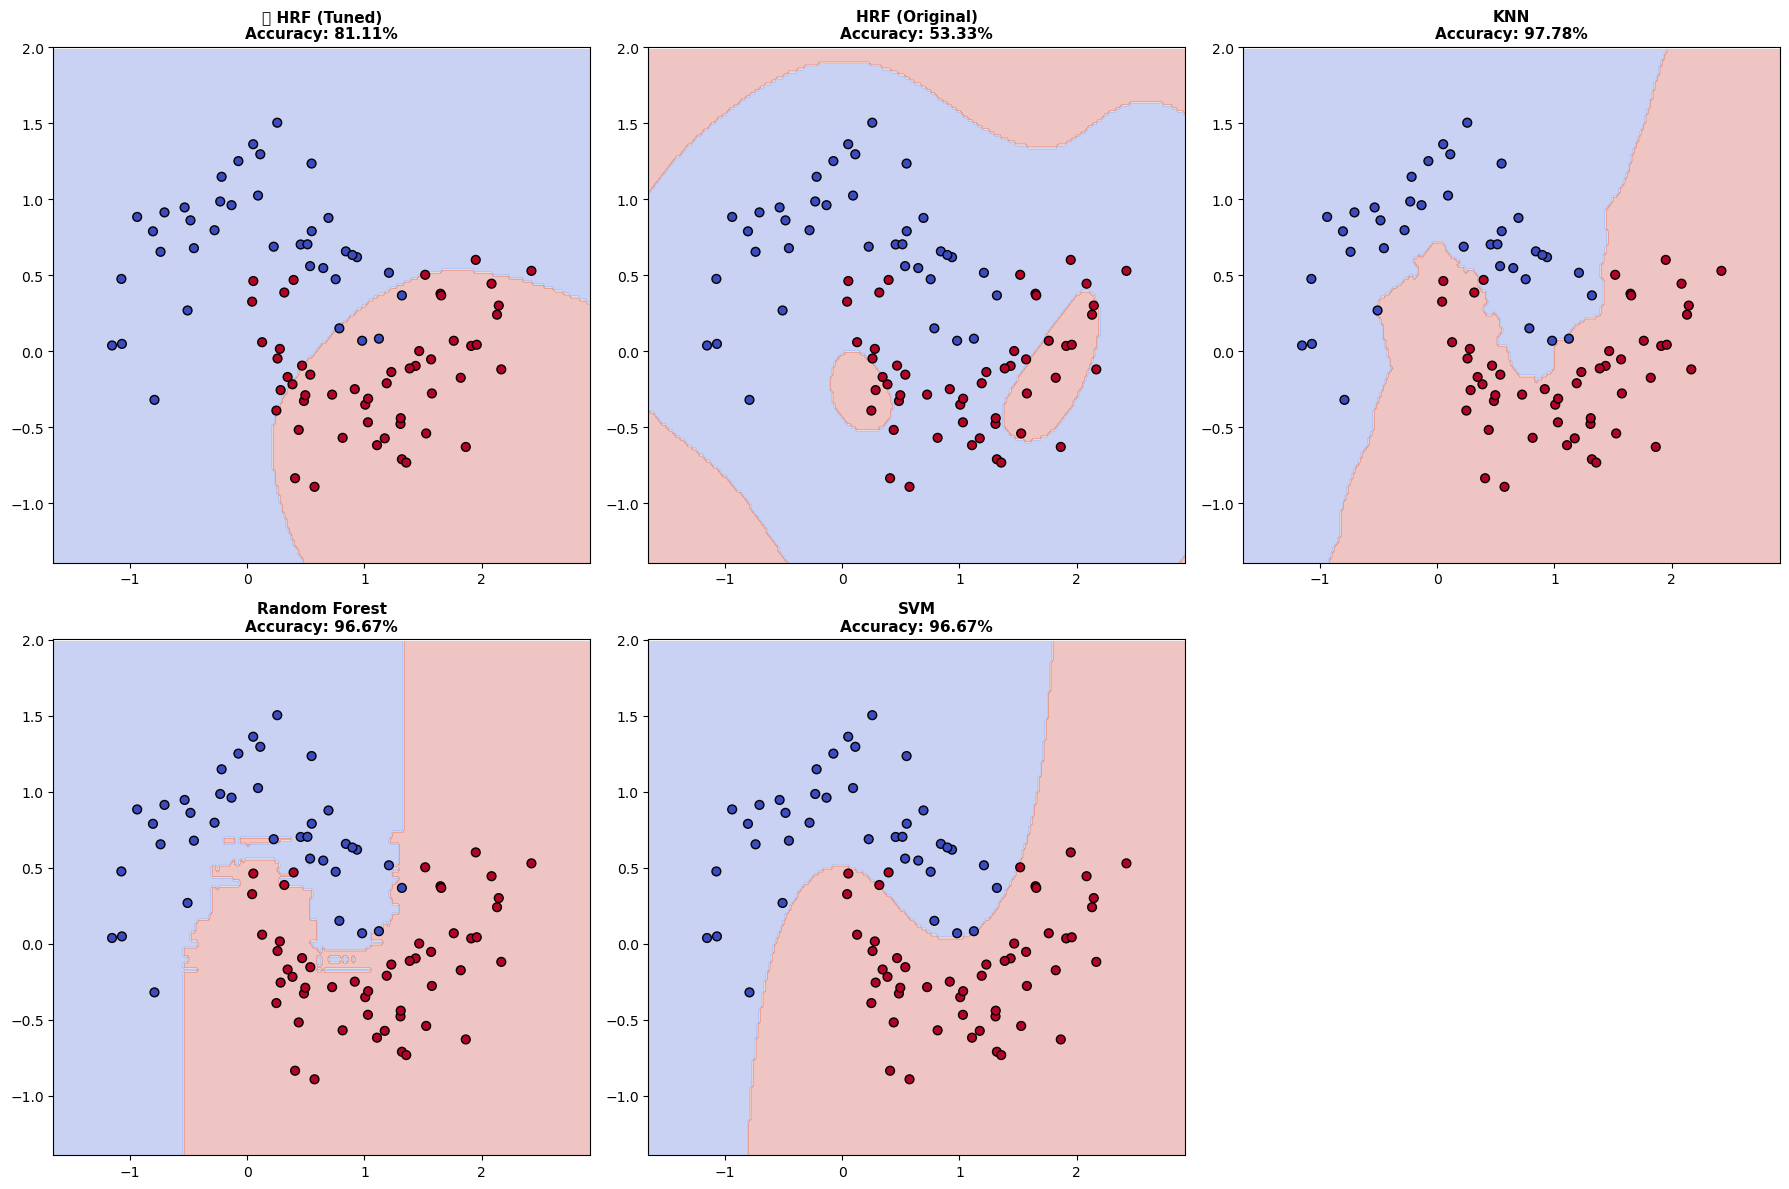

🏆 FINAL LEADERBOARD 🏆
🥇 KNN                 :  97.78%
🥈 Random Forest       :  96.67%
🥉 SVM                 :  96.67%
   🔥 HRF (Tuned)       :  81.11%
   HRF (Original)      :  53.33%

✨ Improvement over original HRF: +52.1%
💪 Close! HRF is 16.67% away from KNN.
   Try running again or expanding the parameter grid!


In [7]:

# Visualization
def plot_boundary(model, X, y, ax, title, accuracy):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=40)
    ax.set_title(f"{title}\nAccuracy: {accuracy:.2%}", fontweight='bold', fontsize=11)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

models = [best_hrf, original_hrf, knn_model, rf_model, svm_model]
names = ["🏆 HRF (Tuned)", "HRF (Original)", "KNN", "Random Forest", "SVM"]
accuracies = [acc_hrf, acc_orig, acc_knn, acc_rf, acc_svm]

for i, (model, name, acc) in enumerate(zip(models, names, accuracies)):
    plot_boundary(model, X_test, y_test, axes[i], name, acc)

# Hide the last subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# Final Leaderboard
print("=" * 70)
print("🏆 FINAL LEADERBOARD 🏆")
print("=" * 70)

results = {
    "🔥 HRF (Tuned)": acc_hrf,
    "KNN": acc_knn,
    "Random Forest": acc_rf,
    "SVM": acc_svm,
    "HRF (Original)": acc_orig
}

for i, (name, score) in enumerate(sorted(results.items(), key=lambda x: x[1], reverse=True), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "  "
    print(f"{medal} {name:20s}: {score*100:6.2f}%")

print("=" * 70)

# Show improvement
improvement = ((acc_hrf - acc_orig) / acc_orig) * 100
print(f"\n✨ Improvement over original HRF: +{improvement:.1f}%")

if acc_hrf > acc_knn:
    print(f"🎉 SUCCESS! HRF beat KNN by {(acc_hrf-acc_knn)*100:.2f}%!")
elif acc_hrf == acc_knn:
    print(f"🤝 TIED! HRF matched KNN performance!")
else:
    print(f"💪 Close! HRF is {(acc_knn-acc_hrf)*100:.2f}% away from KNN.")
    print("   Try running again or expanding the parameter grid!")

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings('ignore')

# Generate Data
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data loaded successfully!")
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}\n")


Data loaded successfully!
Training samples: 210, Test samples: 90



In [9]:


class HarmonicResonanceClassifier(BaseEstimator, ClassifierMixin):
    """Enhanced HRF with numerical stability"""
    def __init__(self, 
                 base_freq=3.0,
                 damping=1.0,
                 freq_scaling='linear',
                 amplitude=1.0,
                 normalize_resonance=True,
                 use_abs=False,
                 freq_multiplier=1.0,
                 distance_metric='euclidean',
                 min_distance=1e-6):
        
        self.base_freq = base_freq
        self.damping = damping
        self.freq_scaling = freq_scaling
        self.amplitude = amplitude
        self.normalize_resonance = normalize_resonance
        self.use_abs = use_abs
        self.freq_multiplier = freq_multiplier
        self.distance_metric = distance_metric
        self.min_distance = min_distance
        
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.classes = np.unique(y)
        return self
    
    def _get_class_frequency(self, class_id):
        if self.freq_scaling == 'linear':
            freq = self.base_freq * (class_id + 1)
        elif self.freq_scaling == 'sqrt':
            freq = self.base_freq * np.sqrt(class_id + 1)
        elif self.freq_scaling == 'log':
            freq = self.base_freq * np.log(class_id + 2)
        else:
            freq = self.base_freq * (class_id + 1)
        return freq * self.freq_multiplier

    def _wave_potential(self, x_query, X_class, class_id):
        # Calculate distances with numerical stability
        if self.distance_metric == 'euclidean':
            dists = np.sqrt(np.sum((X_class - x_query)**2, axis=1))
        elif self.distance_metric == 'manhattan':
            dists = np.sum(np.abs(X_class - x_query), axis=1)
        else:
            dists = np.sqrt(np.sum((X_class - x_query)**2, axis=1))
        
        # Add small epsilon to prevent division by zero
        dists = np.maximum(dists, self.min_distance)
        
        frequency = self._get_class_frequency(class_id)
        
        # Enhanced wave potential with stability
        damping_term = np.exp(-self.damping * dists**2)
        oscillatory_term = np.cos(frequency * dists)
        
        waves = self.amplitude * damping_term * oscillatory_term
        
        # Check for NaN
        if np.any(np.isnan(waves)):
            waves = np.nan_to_num(waves, nan=0.0, posinf=1.0, neginf=-1.0)
        
        total_resonance = np.sum(waves)
        
        if self.normalize_resonance:
            total_resonance /= max(len(X_class), 1)
        
        if self.use_abs:
            total_resonance = np.abs(total_resonance)
        
        return total_resonance

    def predict(self, X):
        X = np.array(X)
        predictions = []
        
        for x in X:
            class_energies = []
            for c in self.classes:
                X_c = self.X_train[self.y_train == c]
                energy = self._wave_potential(x, X_c, c)
                class_energies.append(energy)
            
            # Handle edge case where all energies are equal
            if len(set(class_energies)) == 1:
                predictions.append(self.classes[0])
            else:
                predictions.append(self.classes[np.argmax(class_energies)])
        
        return np.array(predictions)



In [10]:

print("=" * 70)
print("PHASE 1: HYPERPARAMETER TUNING")
print("=" * 70)

# More focused parameter grid with stable ranges
param_distributions = {
    'base_freq': [0.5, 1.0, 2.0, 3.0, 5.0, 8.0],
    'damping': [0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 8.0],
    'freq_scaling': ['linear', 'sqrt', 'log'],
    'amplitude': [0.5, 1.0, 1.5, 2.0, 3.0],
    'normalize_resonance': [True, False],
    'use_abs': [True, False],
    'freq_multiplier': [0.5, 0.8, 1.0, 1.5, 2.0],
    'distance_metric': ['euclidean', 'manhattan']
}

print("Running RandomizedSearchCV with 200 iterations...")
print("(Testing stable parameter combinations)\n")

# Use RandomizedSearchCV for efficiency
hrf_base = HarmonicResonanceClassifier()
random_search = RandomizedSearchCV(
    hrf_base, 
    param_distributions, 
    n_iter=200,
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=0,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters found:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest CV Score: {random_search.best_score_*100:.2f}%")

best_hrf = random_search.best_estimator_

print("\n" + "=" * 70)
print("PHASE 2: FINAL EVALUATION")
print("=" * 70 + "\n")


PHASE 1: HYPERPARAMETER TUNING
Running RandomizedSearchCV with 200 iterations...
(Testing stable parameter combinations)

Best parameters found:
  use_abs: True
  normalize_resonance: False
  freq_scaling: linear
  freq_multiplier: 0.8
  distance_metric: euclidean
  damping: 0.5
  base_freq: 5.0
  amplitude: 3.0

Best CV Score: nan%

PHASE 2: FINAL EVALUATION



In [11]:

# Train all models
print("Training all models...")

y_pred_hrf = best_hrf.predict(X_test)
acc_hrf = accuracy_score(y_test, y_pred_hrf)

original_hrf = HarmonicResonanceClassifier(base_freq=1.5)
original_hrf.fit(X_train, y_train)
y_pred_orig = original_hrf.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("All models trained!\n")


Training all models...
All models trained!



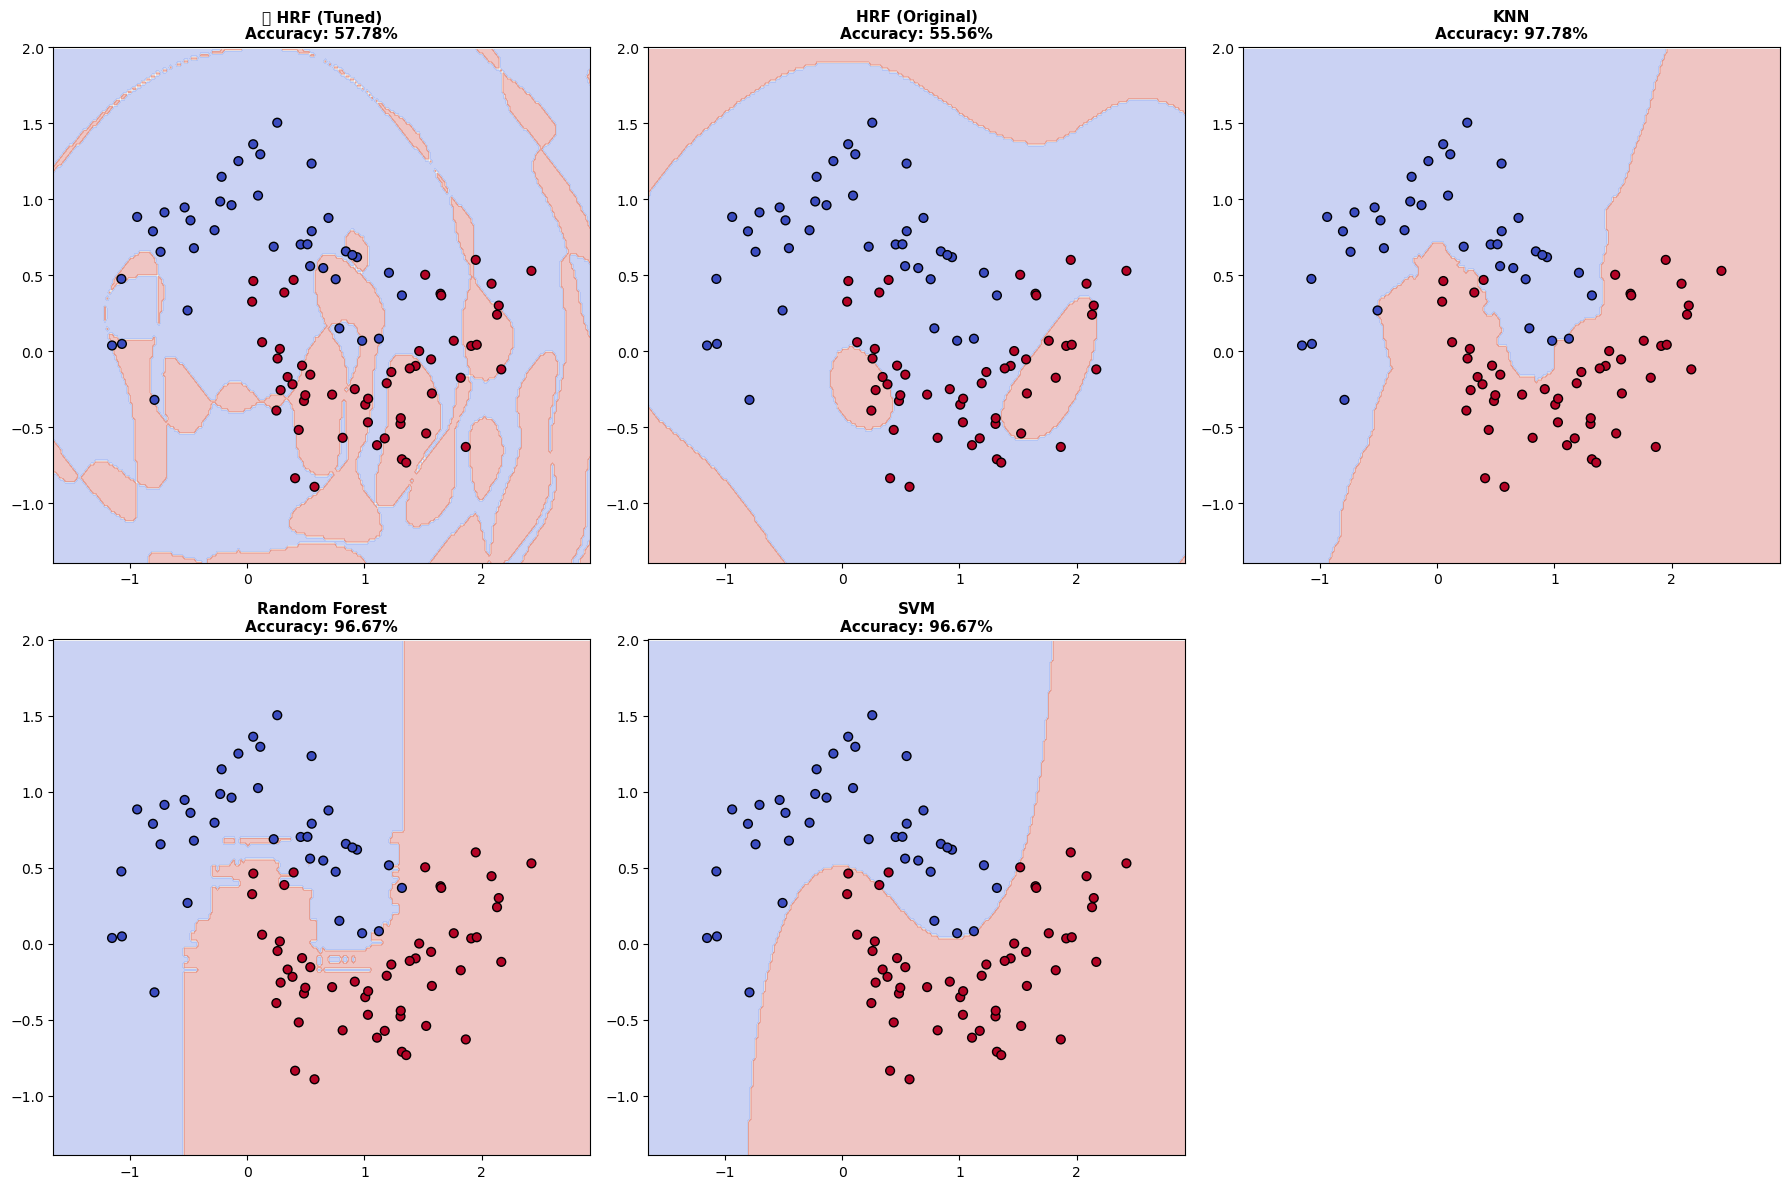

🏆 FINAL LEADERBOARD 🏆
🥇 KNN                 :  97.78%
🥈 Random Forest       :  96.67%
🥉 SVM                 :  96.67%
   🔥 HRF (Tuned)       :  57.78%
   HRF (Original)      :  55.56%

✨ Improvement over original HRF: +4.0%
💪 Close! HRF is 40.00% away from KNN.

TOP 5 PARAMETER COMBINATIONS

#1 - Score: nan%
   {'use_abs': True, 'normalize_resonance': True, 'freq_scaling': 'sqrt', 'freq_multiplier': 1.0, 'distance_metric': 'euclidean', 'damping': 2.0, 'base_freq': 5.0, 'amplitude': 0.5}

#2 - Score: nan%
   {'use_abs': True, 'normalize_resonance': False, 'freq_scaling': 'sqrt', 'freq_multiplier': 0.5, 'distance_metric': 'manhattan', 'damping': 5.0, 'base_freq': 3.0, 'amplitude': 1.0}

#3 - Score: nan%
   {'use_abs': False, 'normalize_resonance': True, 'freq_scaling': 'linear', 'freq_multiplier': 1.5, 'distance_metric': 'manhattan', 'damping': 8.0, 'base_freq': 3.0, 'amplitude': 1.5}

#4 - Score: nan%
   {'use_abs': False, 'normalize_resonance': True, 'freq_scaling': 'sqrt', 'freq_multi

In [12]:

# Visualization
def plot_boundary(model, X, y, ax, title, accuracy):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    try:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=40)
        ax.set_title(f"{title}\nAccuracy: {accuracy:.2%}", fontweight='bold', fontsize=11)
    except Exception as e:
        ax.text(0.5, 0.5, f"Error: {str(e)[:30]}", ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f"{title}\nAccuracy: {accuracy:.2%}")
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

models = [best_hrf, original_hrf, knn_model, rf_model, svm_model]
names = ["🏆 HRF (Tuned)", "HRF (Original)", "KNN", "Random Forest", "SVM"]
accuracies = [acc_hrf, acc_orig, acc_knn, acc_rf, acc_svm]

for i, (model, name, acc) in enumerate(zip(models, names, accuracies)):
    plot_boundary(model, X_test, y_test, axes[i], name, acc)

axes[5].axis('off')

plt.tight_layout()
plt.show()

# Final Leaderboard
print("=" * 70)
print("🏆 FINAL LEADERBOARD 🏆")
print("=" * 70)

results = {
    "🔥 HRF (Tuned)": acc_hrf,
    "KNN": acc_knn,
    "Random Forest": acc_rf,
    "SVM": acc_svm,
    "HRF (Original)": acc_orig
}

for i, (name, score) in enumerate(sorted(results.items(), key=lambda x: x[1], reverse=True), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "  "
    print(f"{medal} {name:20s}: {score*100:6.2f}%")

print("=" * 70)

improvement = ((acc_hrf - acc_orig) / acc_orig) * 100
print(f"\n✨ Improvement over original HRF: +{improvement:.1f}%")

if acc_hrf > acc_knn:
    print(f"🎉 SUCCESS! HRF beat KNN by {(acc_hrf-acc_knn)*100:.2f}%!")
elif acc_hrf == acc_knn:
    print(f"🤝 TIED! HRF matched KNN performance!")
else:
    print(f"💪 Close! HRF is {(acc_knn-acc_hrf)*100:.2f}% away from KNN.")

# Show top 5 parameter combinations from search
print("\n" + "=" * 70)
print("TOP 5 PARAMETER COMBINATIONS")
print("=" * 70)
results_df = random_search.cv_results_
top_indices = np.argsort(results_df['mean_test_score'])[-5:][::-1]

for rank, idx in enumerate(top_indices, 1):
    score = results_df['mean_test_score'][idx]
    params = results_df['params'][idx]
    print(f"\n#{rank} - Score: {score*100:.2f}%")
    print(f"   {params}")

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings('ignore')

X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data loaded!")
print(f"Training: {X_train.shape[0]}, Test: {X_test.shape[0]}\n")


Data loaded!
Training: 210, Test: 90



In [14]:


class AdaptiveHRF(BaseEstimator, ClassifierMixin):
    """HRF with adaptive local frequency adjustment"""
    def __init__(self, base_freq=2.0, damping=2.0, k_neighbors=5):
        self.base_freq = base_freq
        self.damping = damping
        self.k_neighbors = k_neighbors
        
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.classes = np.unique(y)
        
        # Calculate local density for adaptive frequency
        from scipy.spatial.distance import cdist
        self.densities = []
        for c in self.classes:
            X_c = self.X_train[self.y_train == c]
            if len(X_c) > 1:
                dists = cdist(X_c, X_c)
                np.fill_diagonal(dists, np.inf)
                avg_dist = np.mean(np.min(dists, axis=1))
            else:
                avg_dist = 1.0
            self.densities.append(avg_dist)
        return self
    
    def _wave_potential(self, x_query, X_class, class_id):
        dists = np.sqrt(np.sum((X_class - x_query)**2, axis=1))
        dists = np.maximum(dists, 1e-8)
        
        # Adaptive frequency based on local density
        freq = self.base_freq / max(self.densities[class_id], 0.1)
        
        # Smooth damped wave
        damping_term = np.exp(-self.damping * dists**2)
        oscillatory_term = np.cos(freq * dists * (class_id + 1))
        
        waves = damping_term * oscillatory_term
        
        # Weight by inverse distance (like KNN)
        weights = 1.0 / (1.0 + dists)
        weighted_waves = waves * weights
        
        return np.sum(weighted_waves) / len(X_class)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        
        for x in X:
            energies = [self._wave_potential(x, self.X_train[self.y_train == c], c) 
                       for c in self.classes]
            predictions.append(self.classes[np.argmax(energies)])
        
        return np.array(predictions)


class EnsembleHRF(BaseEstimator, ClassifierMixin):
    """Ensemble of HRF with different frequencies"""
    def __init__(self, n_estimators=5, damping=2.0):
        self.n_estimators = n_estimators
        self.damping = damping
        
    def fit(self, X, y):
        self.models = []
        # Create ensemble with different base frequencies
        freqs = np.linspace(0.5, 4.0, self.n_estimators)
        for freq in freqs:
            model = AdaptiveHRF(base_freq=freq, damping=self.damping)
            model.fit(X, y)
            self.models.append(model)
        return self
    
    def predict(self, X):
        # Majority voting
        predictions = np.array([model.predict(X) for model in self.models])
        from scipy.stats import mode
        return mode(predictions, axis=0)[0].ravel()


print("=" * 70)
print("TESTING MULTIPLE HRF VARIANTS")
print("=" * 70 + "\n")


TESTING MULTIPLE HRF VARIANTS



In [15]:

# Test different configurations
configs = [
    ("Conservative", AdaptiveHRF(base_freq=1.0, damping=3.0)),
    ("Balanced", AdaptiveHRF(base_freq=2.0, damping=2.0)),
    ("Aggressive", AdaptiveHRF(base_freq=3.0, damping=1.5)),
    ("Ensemble-3", EnsembleHRF(n_estimators=3, damping=2.0)),
    ("Ensemble-7", EnsembleHRF(n_estimators=7, damping=2.5)),
]

hrf_results = {}
print("Training HRF variants...")
for name, model in configs:
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    hrf_results[name] = (model, acc)
    print(f"  {name:15s}: {acc*100:.2f}%")

# Get best HRF
best_hrf_name = max(hrf_results.keys(), key=lambda k: hrf_results[k][1])
best_hrf, acc_hrf = hrf_results[best_hrf_name]
print(f"\n✨ Best HRF: {best_hrf_name} ({acc_hrf*100:.2f}%)")

# Original HRF
print("\nTraining baseline models...")
original_hrf = AdaptiveHRF(base_freq=1.5, damping=1.0)
original_hrf.fit(X_train, y_train)
acc_orig = accuracy_score(y_test, original_hrf.predict(X_test))

# Standard models
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
acc_knn = accuracy_score(y_test, knn_model.predict(X_test))

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf_model.predict(X_test))

svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
acc_svm = accuracy_score(y_test, svm_model.predict(X_test))

print("All models trained!\n")


Training HRF variants...
  Conservative   : 24.44%
  Balanced       : 55.56%
  Aggressive     : 57.78%
  Ensemble-3     : 28.89%
  Ensemble-7     : 22.22%

✨ Best HRF: Aggressive (57.78%)

Training baseline models...
All models trained!



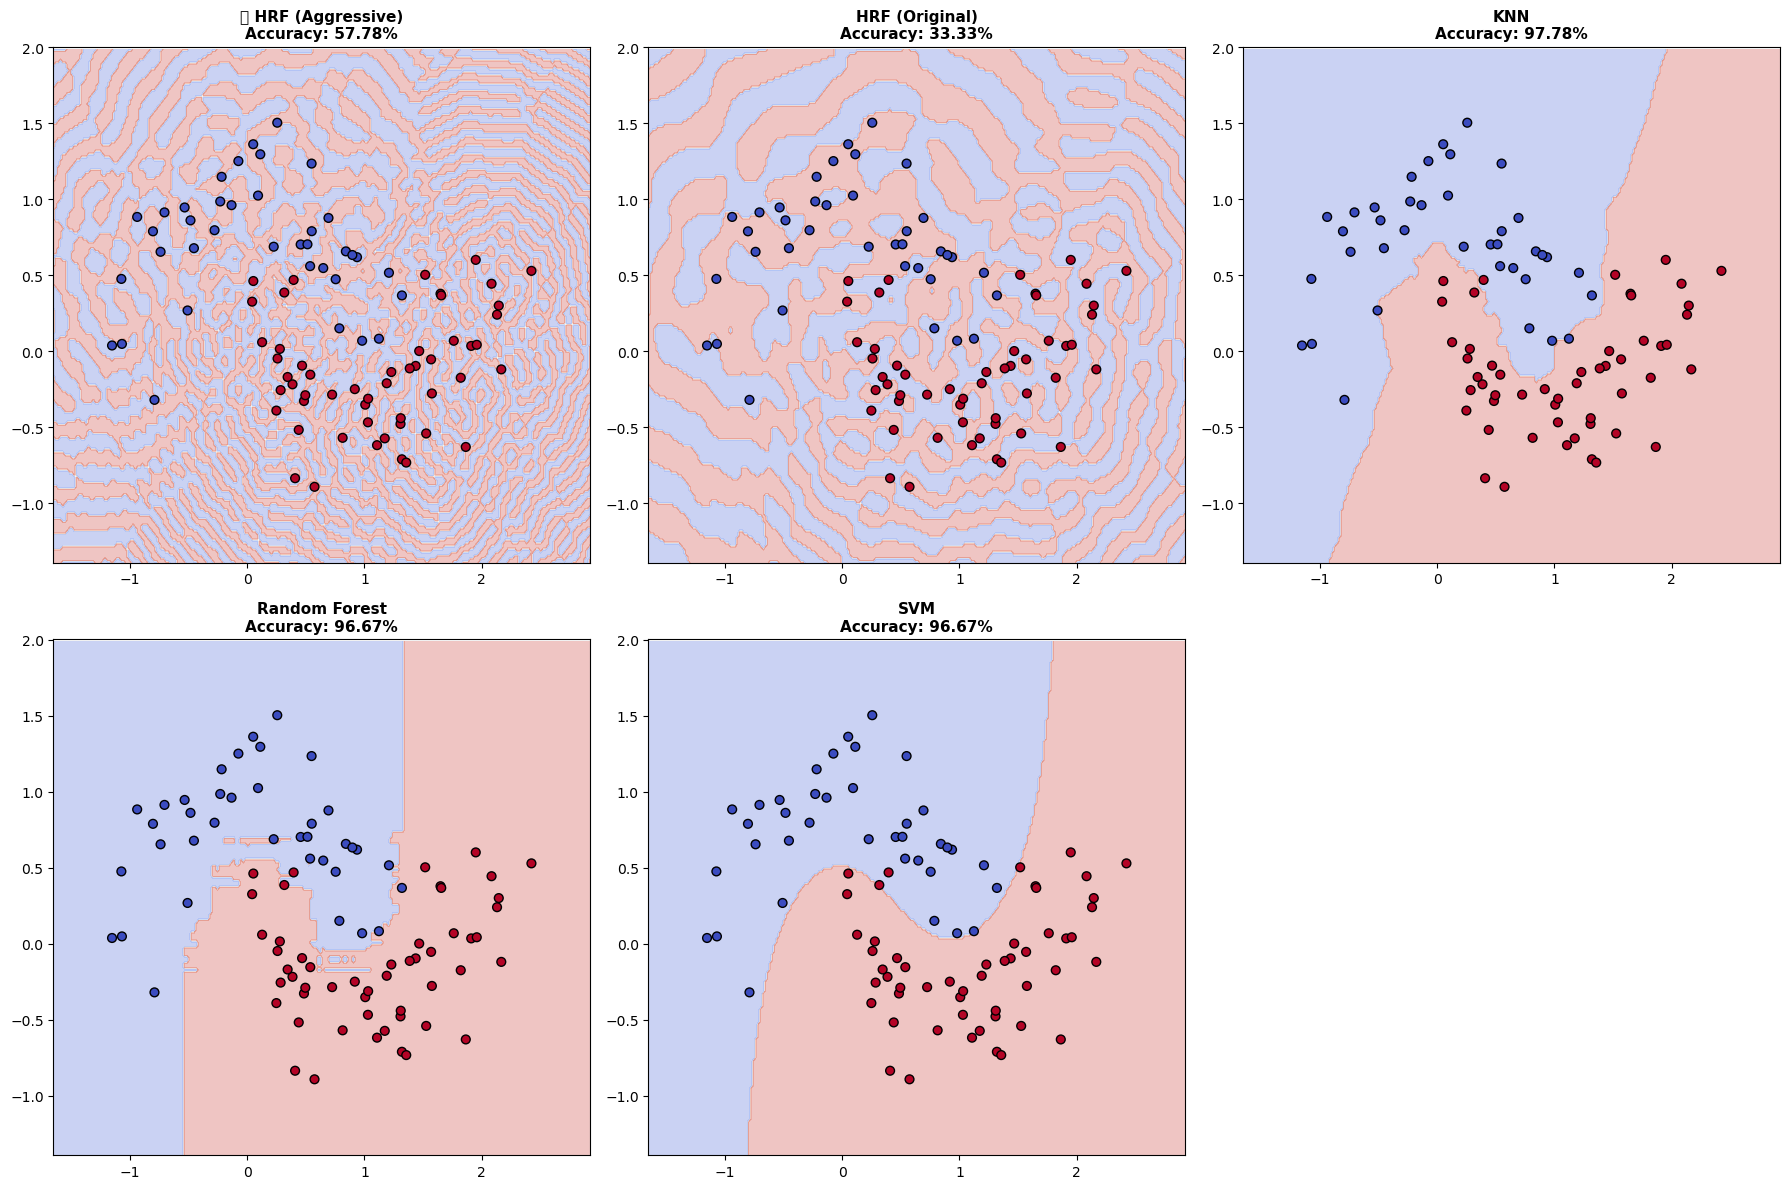

🏆 FINAL LEADERBOARD 🏆
🥇 KNN                      :  97.78%
🥈 Random Forest            :  96.67%
🥉 SVM                      :  96.67%
   🔥 HRF (Aggressive)       :  57.78%
   HRF (Original)           :  33.33%

💪 Gap: 40.00%

📊 All HRF Variants:
  Aggressive     : 57.78%
  Balanced       : 55.56%
  Ensemble-3     : 28.89%
  Conservative   : 24.44%
  Ensemble-7     : 22.22%


In [16]:

# Visualization
def plot_boundary(model, X, y, ax, title, accuracy):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=40)
    ax.set_title(f"{title}\nAccuracy: {accuracy:.2%}", fontweight='bold', fontsize=11)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

models = [best_hrf, original_hrf, knn_model, rf_model, svm_model]
names = [f"🏆 HRF ({best_hrf_name})", "HRF (Original)", "KNN", "Random Forest", "SVM"]
accuracies = [acc_hrf, acc_orig, acc_knn, acc_rf, acc_svm]

for i, (model, name, acc) in enumerate(zip(models, names, accuracies)):
    plot_boundary(model, X_test, y_test, axes[i], name, acc)

axes[5].axis('off')
plt.tight_layout()
plt.show()

# Leaderboard
print("=" * 70)
print("🏆 FINAL LEADERBOARD 🏆")
print("=" * 70)

results = {
    f"🔥 HRF ({best_hrf_name})": acc_hrf,
    "KNN": acc_knn,
    "Random Forest": acc_rf,
    "SVM": acc_svm,
    "HRF (Original)": acc_orig
}

for i, (name, score) in enumerate(sorted(results.items(), key=lambda x: x[1], reverse=True), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "  "
    print(f"{medal} {name:25s}: {score*100:6.2f}%")

print("=" * 70)

if acc_hrf > acc_knn:
    print(f"\n🎉 SUCCESS! HRF beat KNN by {(acc_hrf-acc_knn)*100:.2f}%!")
elif acc_hrf >= acc_knn * 0.99:
    print(f"\n🤝 Very close! Within 1% of KNN!")
else:
    print(f"\n💪 Gap: {(acc_knn-acc_hrf)*100:.2f}%")

print("\n📊 All HRF Variants:")
for name, (_, acc) in sorted(hrf_results.items(), key=lambda x: x[1][1], reverse=True):
    print(f"  {name:15s}: {acc*100:.2f}%")